# 事前環境設定

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as stat
import warnings
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

# 相関係数表

In [3]:
corrmat = df_train.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


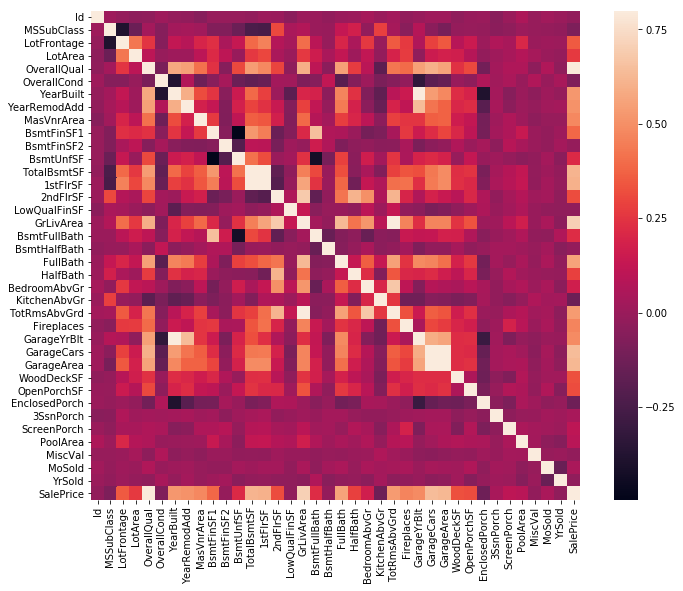

In [4]:
# 相関関係表によりheatmapを作成
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

## 例：価格と強い相関のある変数（数値型）10個抽出、中の一つを前回のモデルに追加

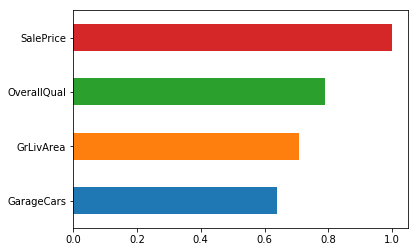

In [5]:
corrmat['SalePrice'] = abs(corrmat['SalePrice'])
ana_list = corrmat['SalePrice'].sort_values().tail(4)
ana_list.plot(kind='barh')

# 可視化

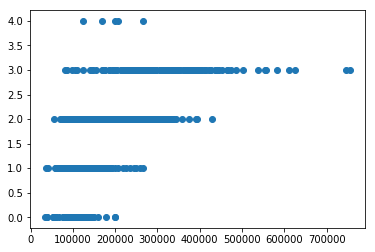

In [6]:
plt.scatter(df_train['SalePrice'],df_train['GarageCars'])
plt.show();

In [7]:
df_train.groupby('GarageCars',as_index=False).SalePrice.median()

,GarageCars,SalePrice
0,0,100000
1,1,128000
2,2,177750
3,3,295000
4,4,200000


In [8]:
df_train.groupby('GarageCars',as_index=False).GarageArea.median()

,GarageCars,GarageArea
0,0,0
1,1,288
2,2,506
3,3,818
4,4,864


In [9]:
len(df_train.loc[df_train['GarageCars']==4])

5

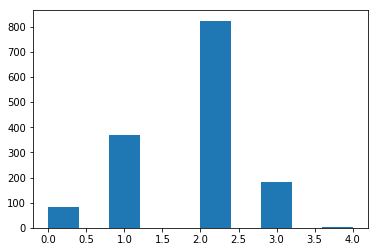

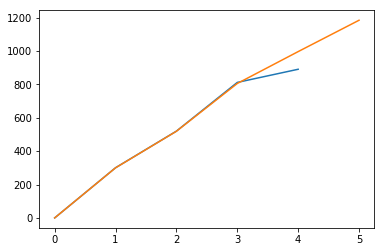

In [10]:
plt.hist(df_train['GarageCars'])
plt.show()
plt.plot(df_train.groupby('GarageCars').GarageArea.mean())
plt.plot(df_test.groupby('GarageCars').GarageArea.mean())

In [11]:
df_train.drop(df_train.loc[df_train['GarageCars']==4].index,inplace=True)
df_train.index=range(len(df_train))

In [12]:
df_train.drop(df_train[df_train['GrLivArea']>=4000].index,inplace=True)
df_train_shrinked=df_train.loc[:,['GrLivArea','YearBuilt','OverallCond','BsmtQual','GarageCars','SalePrice']]
df_x=df_train_shrinked
df_y=df_train_shrinked['SalePrice']
del df_x['SalePrice']

for i in df_x.columns:
    if sum(df_x[i].isnull())>0:
        print(i)
df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
df_x=pd.get_dummies(df_x)
df_x.head(2)

BsmtQual


,GrLivArea,YearBuilt,OverallCond,GarageCars,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA
0,1710,2003,5,2,0,0,1,0,0
1,1262,1976,8,2,0,0,1,0,0


In [13]:
def preprocess(train_flg):
    if train_flg:
        df = pd.read_csv('./train.csv')
        df.drop(df[df['GrLivArea']>=4000].index,inplace=True)
        df.drop(df.loc[df['GarageCars']==4].index,inplace=True)
        df.index=range(len(df))
        df_y=df['SalePrice']
    else:
        df = pd.read_csv('./test.csv')
    cols=['GrLivArea','YearBuilt','OverallCond','BsmtQual','GarageCars']
    df_x = df.loc[:,cols]
    df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
    df_x=pd.get_dummies(df_x)
    if train_flg:
        return df_x,df_y
    else:
        return df_x

In [14]:
df_x,df_y=preprocess(True)

In [15]:
clf = stat.OLS(df_y,df_x)
result = clf.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     694.5
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:18:13   Log-Likelihood:                -17234.
No. Observations:                1451   AIC:                         3.449e+04
Df Residuals:                    1442   BIC:                         3.453e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      78.1346      2.189     35.701      0.000      73.841      82.428
YearBuilt     689.6531     51.144     13.484      0.000     589.328     789.978
OverallCond  9808.9043    898.264     10.920      0.000    8046.860    1.16e+04
GarageCars   1.731e+04   1706.688     10.142      0.000     1.4e+04    2.07e+04
BsmtQual_Ex -1.308e+06   1.03e+05    -12.663      0.000   -1.51e+06   -1.11e+06
BsmtQual_Fa -1.394e+06   9.99e+04    -13.959      0.000   -1.59e+06    -1.2e+06
BsmtQual_Gd -1.383e+06   1.03e+05    -13.453      0.000   -1.59e+06   -1.18e+06
BsmtQual_NA -1.418e+06   1.01e+05    -13.993      0.000   -1.62e+06   -1.22e+06
BsmtQual_TA -1.392e+06   1.01e+05    -13.761      0.000   -1.59e+06   -1.19e+06
==============================================================================
Omnibus:                      333.213   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2274.610
Skew:                           0.889   Prob(JB):                         0.00
Kurtosis:                       8.871   Cond. No.                     6.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE:34839.710767442186


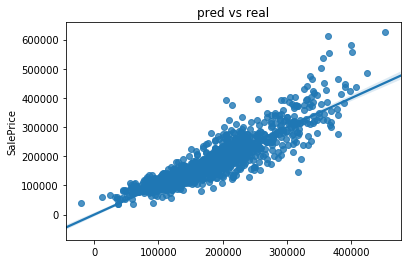

Text(0.5, 1.0, 'Coefficients in the Linear Model')

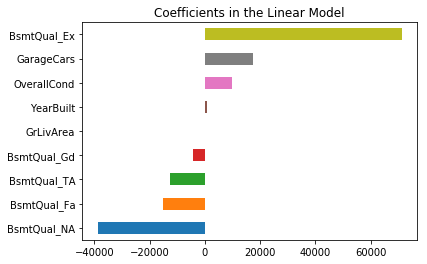

In [16]:
clf=LinearRegression()
clf.fit(df_x,df_y)
print('RMSE:{0}'.format(rmse(clf.predict(df_x),df_y)))
sns.regplot(clf.predict(df_x),df_y)
plt.title('pred vs real')
plt.show()
coef=pd.Series(clf.coef_, index = df_x.columns)
coef.sort_values(ascending=True).plot('barh')
plt.title('Coefficients in the Linear Model')

# テストセットの予測

In [17]:
df_test_x = preprocess(False)

# テストセットの欠損値検出

In [18]:
for i in df_test_x.columns:
    if df_test_x[i].isnull().sum()>0:
        print(i,df_test_x[i].isnull().sum(),df_test_x[i].dtype)

GarageCars 1 float64


In [19]:
df_test_x.loc[df_test_x['GarageCars'].isnull()]

,GrLivArea,YearBuilt,OverallCond,GarageCars,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA
1116,1828,1923,6,NaN,0,0,1,0,0


In [20]:
df_test.loc[1116]

Id                  2577
MSSubClass            70
MSZoning              RM
LotFrontage           50
LotArea             9060
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      IDOTRR
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            5
OverallCond            6
YearBuilt           1923
YearRemodAdd        1999
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      Wd Sdng
Exterior2nd      Plywood
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation        BrkTil
                  ...   
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           6
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Detchd


In [21]:
df_test_x.loc[df_test_x['GarageCars'].isnull(),'GarageCars']=0

In [22]:
# 個別の処理も統合処理関数に追加
def preprocess(train_flg):
    if train_flg:
        df = pd.read_csv('./train.csv')
        df.drop(df[df['GrLivArea']>=4000].index,inplace=True)
        df.drop(df.loc[df['GarageCars']==4].index,inplace=True)
        df.index=range(len(df))
        df_y=df['SalePrice']
    else:
        df = pd.read_csv('./test.csv')
    cols=['GrLivArea','YearBuilt','OverallCond','BsmtQual','GarageCars']
    df_x = df.loc[:,cols]
    df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
    df_x.loc[df_x['GarageCars'].isnull()==True,'GarageCars']=0
    df_x=pd.get_dummies(df_x)
    if train_flg:
        return df_x,df_y
    else:
        return df_x,df['Id']

In [23]:
df_test_x,df_test_id=preprocess(False)

In [24]:
# 上記の線形モデルで価格を予測、CSV出力
y_pred=clf.predict(df_test_x)
pred_df=pd.DataFrame(y_pred, index=df_test_id, columns=["SalePrice"])
pred_df.to_csv('./output.csv', header=True, index_label='Id')

#### 線形回帰以外に、使うデータによりもっと精度のいいモデルもいくつかあります。
#### sklearnにはRandomForest、GradientBoosting、以外にXGBoost、LightGBMなど、お時間のある方はお試してみてください。
#### インストールとチューニングの時間を含んで考えると、RandomForestとGradientBoostingはオススメです。
#### これらのモデルはモデルの中身がどうなっているかは明白ではありませんが、どの変数がモデル精度向上に貢献したかを出力することができます（.feature\_importances\_）。